In [36]:
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("../../")

import anndata
from scipy.stats import spearmanr, pearsonr
import numpy as np
from PIL import Image
import matplotlib

from digitalhistopathology.clustering.clustering_utils import plot_ari_scores_all_patients
import warnings

# Suppress all UserWarning messages
warnings.filterwarnings("ignore", category=UserWarning)

Image.MAX_IMAGE_PIXELS = None
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42

In [37]:
# Load configuration
with open("../../config/config_notebooks_TNBC.json", "r") as config_file:
    config = json.load(config_file)

In [38]:
from digitalhistopathology.benchmark.benchmark_clustering import BenchmarkClustering

# Initialize the BenchmarkClustering object

saving_folder=os.path.join(config['base_benchmark_folder'], "unsupervised_clustering_ARI", "kmeans")
extension='pdf'


benchmark_clustering = BenchmarkClustering(path_to_pipeline=config['path_to_base_pipelines'],
                                           pipelines_list=config['base_model_list'],
                                           results_folder="../../results",
                                           saving_folder=saving_folder,
                                           dataset=config['dataset'],
                                           extension=extension, 
                                           
                                           )

['uni', 'uni2', 'virchow', 'provgigapath', 'ctranspath', 'simclr']
<class 'list'>
Label files: []


In [39]:
a = config["base_color_palette"]
sns.set_palette(a)
base_model_palette = config["base_model_palette"]

base_model_list = config["base_model_list"]
benchmark_folder = config["base_benchmark_folder"]

## Create Figure2 folder
if not os.path.exists(os.path.join(config['figures_folder'], "Figure2")):
    os.makedirs(os.path.join(config['figures_folder'], "Figure2"))

## Create Figure3 folder
if not os.path.exists(os.path.join(config['figures_folder'], "Figure3")):
    os.makedirs(os.path.join(config['figures_folder'], "Figure3"))

## Create Figure4 folder
if not os.path.exists(os.path.join(config['figures_folder'], "Figure4")):
    os.makedirs(os.path.join(config['figures_folder'], "Figure4"))
    
## Create Figure5 folder
if not os.path.exists(os.path.join(config['figures_folder'], "Figure5")):
    os.makedirs(os.path.join(config['figures_folder'], "Figure5"))

In [40]:
benchmark_clustering.saving_folder

'../../results/TNBC/benchmark/base_models/unsupervised_clustering_ARI/kmeans'

## Comparison between linear and unlinear clustering

In [41]:
raw_clust = benchmark_clustering.unsupervised_clustering_benchmark(n_clusters=None, clustering_name='raw')

svd_clust = benchmark_clustering.unsupervised_clustering_benchmark(n_clusters=None, clustering_name='svd5')

umap_clust = benchmark_clustering.get_best_UMAP_ari_per_slide(force_loading=True)

## Add handcrafted features once computed
import glob
umap_clust["handcrafted_features"] = {}
for file in glob.glob(os.path.join(benchmark_clustering.saving_folder, f'best_umap_ari_model_handcrafted_features_patient_*.json')):
    patient_name = os.path.basename(file).split("_patient_")[1].split('.json')[0]
    with open(file, 'r') as f:
        umap_clust["handcrafted_features"][patient_name] = json.load(f)


Loading unsupervised clustering results for model uni...
Loading unsupervised clustering results for model uni2...
Loading unsupervised clustering results for model virchow...
Loading unsupervised clustering results for model provgigapath...
Loading unsupervised clustering results for model ctranspath...
Loading unsupervised clustering results for model simclr...
Loading unsupervised clustering results for model uni...
Loading unsupervised clustering results for model uni2...
Loading unsupervised clustering results for model virchow...
Loading unsupervised clustering results for model provgigapath...
Loading unsupervised clustering results for model ctranspath...
Loading unsupervised clustering results for model simclr...
Embeddings per patient: None
Force loading best UMAP parameters for model virchow for existing patients...
Force loading best UMAP parameters for model provgigapath for existing patients...
Force loading best UMAP parameters for model uni for existing patients...
Forc

In [42]:
for model in raw_clust.keys():
    print(f"Model: {model}: ari all: {raw_clust[model]['all']['ari']}, ari mean: {raw_clust[model]['mean']['ari']}")

Model: uni: ari all: 0.24181559049465756, ari mean: 0.3353989381110288
Model: uni2: ari all: 0.27478935435117996, ari mean: 0.3251135049300832
Model: virchow: ari all: 0.2734224568080426, ari mean: 0.39773595069423406
Model: provgigapath: ari all: 0.24735304005949224, ari mean: 0.3380081599122742
Model: ctranspath: ari all: 0.21429571419837035, ari mean: 0.3188864102076286
Model: simclr: ari all: 0.18425489792160496, ari mean: 0.2388426572696648


In [43]:
for model in raw_clust.keys():
    print(f"Model: {model}: ari tumor: {raw_clust[model]['ARI_tumor']}")

Model: uni: ari tumor: 0.01924608024415077
Model: uni2: ari tumor: 0.016880599202019578
Model: virchow: ari tumor: 0.01970648911750638
Model: provgigapath: ari tumor: 0.018199372273981558
Model: ctranspath: ari tumor: 0.01817290863007095
Model: simclr: ari tumor: 0.013451746743232483


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


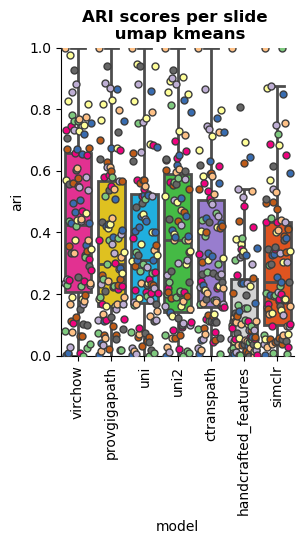

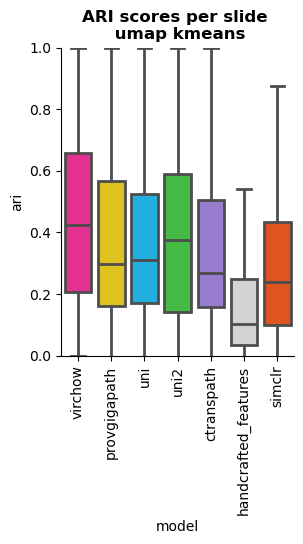

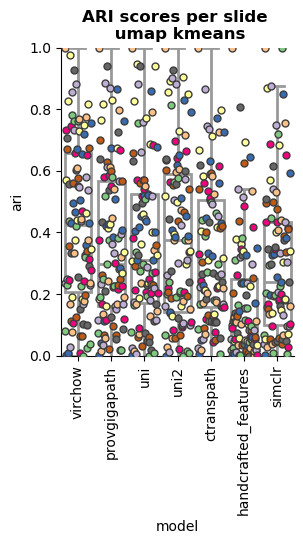

In [44]:
# for clust_dict, clust_name in zip([raw_clust, svd_clust, umap_clust], ["raw", "svd", "umap"]):

plt.figure(figsize=(3,4))
plot_ari_scores_all_patients(umap_clust, model_list=umap_clust.keys(), color_boxes=True, palette=base_model_palette)
plt.ylim(0, 1)
plt.title(f"ARI scores per slide \n umap kmeans", weight='bold')
# plt.savefig(os.path.join(config["figures_folder"],"Figure2/ARI_scores_boxplot_umap_kmeans_colored_with_patient.pdf"), bbox_inches='tight')
if len(umap_clust[base_model_list[0]]) > 15:
    plt.legend().remove()
    
plt.figure(figsize=(3,4))
plot_ari_scores_all_patients(umap_clust, model_list=umap_clust.keys(), stripplot=False, color_boxes=True, palette=base_model_palette)
plt.ylim(0, 1)
plt.title(f"ARI scores per slide \n umap kmeans", weight='bold')
# plt.savefig(os.path.join(config["figures_folder"],"Figure2/ARI_scores_boxplot_umap_kmeans_colored_without_patient.pdf"), bbox_inches='tight')
if len(umap_clust[base_model_list[0]]) > 15:
    plt.legend().remove()
    
plt.figure(figsize=(3,4))
plot_ari_scores_all_patients(umap_clust, model_list=umap_clust.keys(), stripplot=True, color_boxes=False)
plt.ylim(0, 1)
plt.title(f"ARI scores per slide \n umap kmeans", weight='bold')
# plt.savefig(os.path.join(config["figures_folder"],"Figure2/ARI_scores_boxplot_umap_kmeans_no_color_with_patient.pdf"), bbox_inches='tight')
if len(umap_clust[base_model_list[0]]) > 15:
    plt.legend().remove()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'ARI scores per slide \n UMAP k-means')

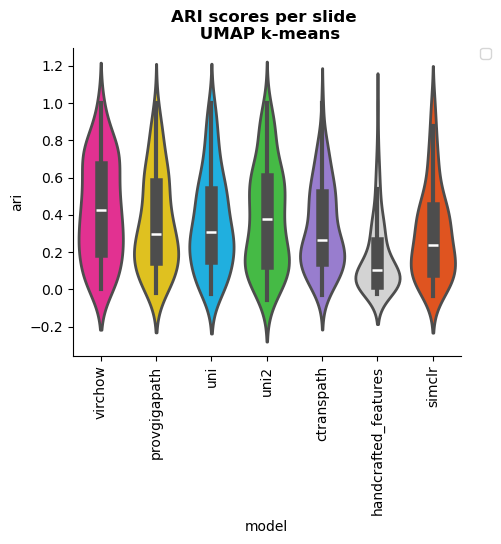

In [45]:
ari_scores = {}
for model in umap_clust.keys():
    ari_scores[model] = {}
    for patient in umap_clust[model].keys():
        if (patient != 'all') and (patient != 'mean'):
            ari_scores[model][patient] = umap_clust[model][patient]['ari']
df_aris = pd.DataFrame.from_dict(ari_scores)
df_aris_melted = pd.melt(df_aris, var_name='model', value_name='ari')
df_aris_melted['patient'] = df_aris.index.to_list()*len(df_aris.columns)

plt.figure(figsize=(5,4))
sns.violinplot(data=df_aris_melted, x='model', y='ari', hue='model', linewidth=2, palette=base_model_palette)


plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.title(f'ARI scores per slide \n UMAP k-means', weight='bold')

Text(0.5, 1.0, 'Distribution of ARI scores for unsupervised clustering \n n_patient=94')

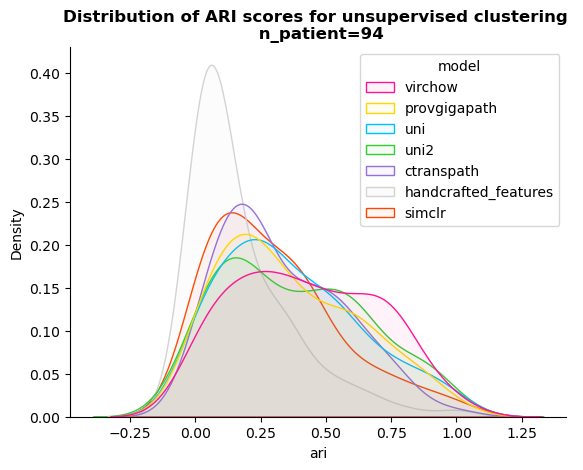

In [46]:
sns.kdeplot(data=df_aris_melted, x='ari', hue='model', fill=True, alpha=0.05, palette=base_model_palette)
sns.despine()
plt.title(f'Distribution of ARI scores for unsupervised clustering \n n_patient={len(list(umap_clust[list(umap_clust.keys())[0]].keys()))}', weight='bold')

In [47]:
# Scatter plot

In [48]:
dfs_clust = []
for clustering_dict, method in zip([raw_clust, svd_clust, umap_clust], ["raw", "svd", "umap"]):
#for clustering_dict, method in zip([umap_clust], ["umap"]):
    ari_scores = {}
    for model in clustering_dict.keys():
        ari_scores[model] = {}
        for patient in clustering_dict[model].keys():
            if patient != "ARI_tumor":
            #if (patient != 'all') and (patient != 'mean'):
                ari_scores[model][patient] = clustering_dict[model][patient]['ari']
    df_aris = pd.DataFrame.from_dict(ari_scores)
    df_aris_melted = pd.melt(df_aris, var_name='model', value_name='ari')
    df_aris_melted['patient'] = df_aris.index.to_list()*len(df_aris.columns)
    df_aris_melted['clustering'] = method
    dfs_clust.append(df_aris_melted)

df_comp = pd.concat(dfs_clust)




In [49]:
df_comp

,model,ari,patient,clustering
0,uni,0.401375,TNBC1_CN1_C1,raw
1,uni,0.514197,TNBC2_CN1_E1,raw
2,uni,0.168349,TNBC3_CN2_C1,raw
3,uni,0.824906,TNBC4_CN2_D2,raw
4,uni,0.328768,TNBC5_CN3_D1,raw
...,...,...,...,...
653,simclr,0.094657,TNBC53_CN27_C1,umap
654,simclr,0.161530,TNBC80_CN40_E2,umap
655,simclr,0.340460,TNBC40_CN20_E1,umap
656,simclr,0.591846,TNBC22_CN11_E2,umap


In [50]:
df_comp[df_comp['clustering'] == 'raw'][['model', 'ari']].groupby('model').mean()

,ari
model,
ctranspath,0.317797
provgigapath,0.337064
simclr,0.238274
uni,0.334424
uni2,0.324589
virchow,0.396441


In [51]:
df_comp[df_comp['clustering'] == 'raw'][['model', 'ari']].groupby('model').std()

,ari
model,
ctranspath,0.234872
provgigapath,0.243975
simclr,0.217852
uni,0.257511
uni2,0.242351
virchow,0.240646


In [52]:
## Correlation with shannon entropy
import json 
with open(os.path.join(benchmark_folder, "shannon_entropy", "shannon_entropy_all_comps_raw.json")) as f:
    shannon_entropy = json.load(f)
    


In [53]:
shannon_entropy

{'uni': 0.5358938926869943,
 'uni2': 0.5285265915249335,
 'provgigapath': 0.5088497549187181,
 'virchow': 0.3328560055967653,
 'ctranspath': 0.28394198738789117,
 'simclr': 0.3331804304259933,
 'handcrafted': 0.05471412794914359}

(0.0, 0.6)

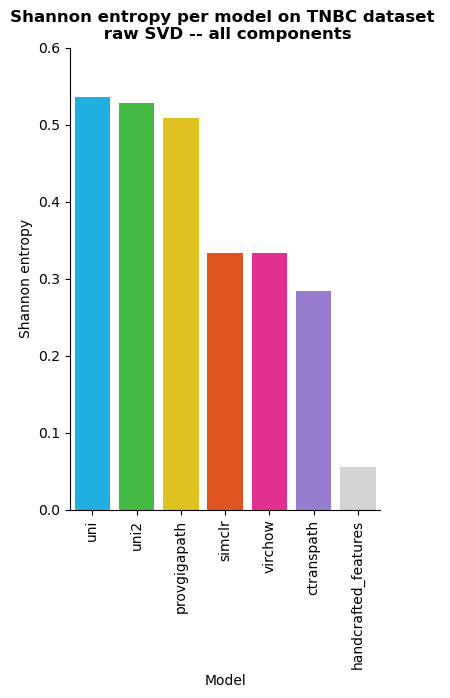

In [54]:
plt.figure(figsize=(4, 6))
df_shannon = pd.DataFrame.from_dict(shannon_entropy, orient='index', columns=['shannon_entropy'])
df_shannon.rename(index={'handcrafted': 'handcrafted_features'}, inplace=True)

df_shannon.sort_values('shannon_entropy', inplace=True, ascending=False)
sns.barplot(data=df_shannon, 
            x=df_shannon.index, 
            y='shannon_entropy', 
            hue=df_shannon.index, palette=base_model_palette)
sns.despine()
plt.xlabel("Model")
plt.ylabel("Shannon entropy")
plt.title(f"Shannon entropy per model on {config['dataset']} dataset \n raw SVD -- all components", weight='bold')
plt.xticks(rotation=90)
plt.savefig(os.path.join(config['figures_folder'], "Figure2/shannon_entropy.pdf"), bbox_inches='tight')
plt.ylim(0, 0.6)

In [55]:
ari_raw = pd.DataFrame.from_dict({model: {patient: raw_clust[model][patient]['ari'] for patient in raw_clust[model].keys() if patient not in ["ARI_tumor"]} for model in raw_clust.keys()})
df_raw_overall = pd.DataFrame(ari_raw.loc["all"])
df_raw_overall.columns = ['ari']

In [56]:
ari_svd = pd.DataFrame.from_dict({model: {patient: svd_clust[model][patient]['ari'] for patient in svd_clust[model].keys()  if patient != 'ARI_tumor'} for model in svd_clust.keys()})
df_svd_overall = pd.DataFrame(ari_svd.loc["all"])
df_svd_overall.columns = ['ari']

In [57]:
ari_umap_overall = benchmark_clustering.get_best_UMAP_ari_overall()   

Computing best UMAP parameters for model uni...
Loading best UMAP parameters for model uni...
Computing best UMAP parameters for model uni2...
Loading best UMAP parameters for model uni2...
Computing best UMAP parameters for model virchow...
Loading best UMAP parameters for model virchow...
Computing best UMAP parameters for model provgigapath...
Loading best UMAP parameters for model provgigapath...
Computing best UMAP parameters for model ctranspath...
Loading best UMAP parameters for model ctranspath...
Computing best UMAP parameters for model simclr...
Loading best UMAP parameters for model simclr...


In [58]:


try:
    with open(os.path.join(config['base_benchmark_folder'], 'unsupervised_clustering_ARI', 'kmeans', f'best_umap_ari_overall.json')) as f:
        ari_umap_overall = json.load(f)
except:
    ari_umap_overall = benchmark_clustering.get_best_UMAP_ari_overall()
ari_umap_overall = benchmark_clustering.get_best_UMAP_ari_overall()   
df_umap_overall = pd.DataFrame(ari_umap_overall).T[['ari']]


Computing best UMAP parameters for model uni...
Loading best UMAP parameters for model uni...
Computing best UMAP parameters for model uni2...
Loading best UMAP parameters for model uni2...
Computing best UMAP parameters for model virchow...
Loading best UMAP parameters for model virchow...
Computing best UMAP parameters for model provgigapath...
Loading best UMAP parameters for model provgigapath...
Computing best UMAP parameters for model ctranspath...
Loading best UMAP parameters for model ctranspath...
Computing best UMAP parameters for model simclr...
Loading best UMAP parameters for model simclr...


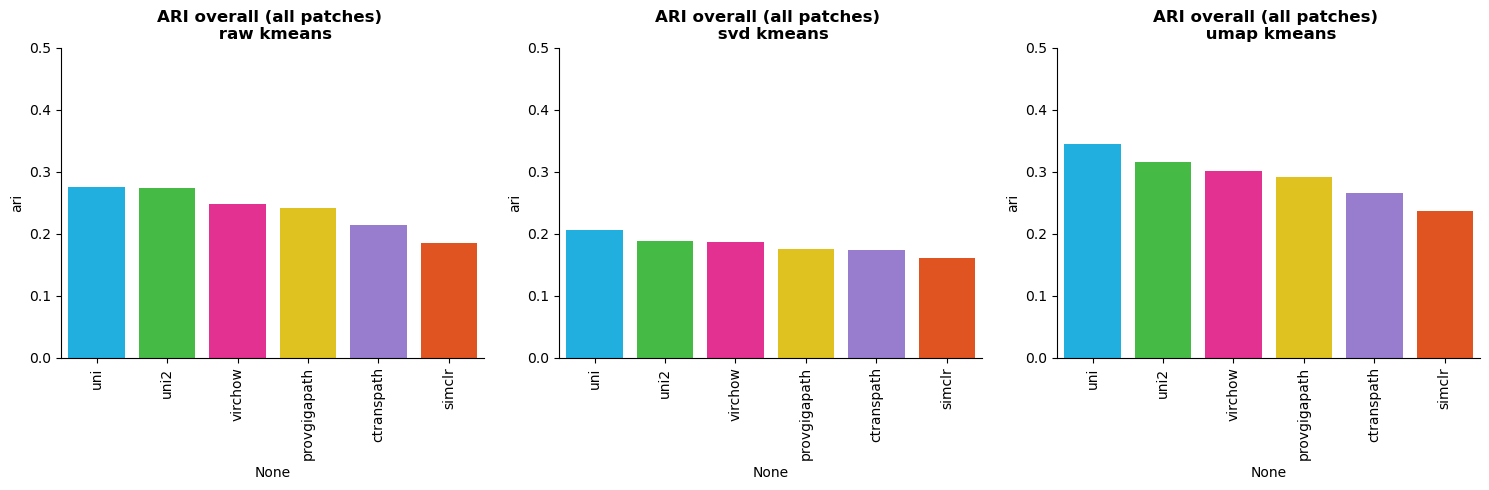

In [59]:
plt.figure(figsize=(15, 5))

names = ["raw kmeans", "svd kmeans", "umap kmeans"]

for i, df_ari_overall in enumerate([df_raw_overall, df_svd_overall, df_umap_overall]):
    plt.subplot(1, 3, 1 + i)
    sns.barplot(data=df_ari_overall.sort_values("ari", ascending=False), x=df_ari_overall.index, y="ari", hue=df_ari_overall.index, palette=base_model_palette)
    plt.xticks(rotation=90)
    sns.despine()
    plt.tight_layout()
    plt.ylim(0, 0.5)
    plt.title(f"ARI overall (all patches) \n {names[i]}", weight='bold')


plt.savefig(os.path.join(config['figures_folder'], "Figure2/unsupervised_clustering_raw_svd_umap_barplot.pdf"), bbox_inches='tight')



## Correlation ARI and shannon entropy

In [60]:
df_shannon.rename(index={'handcrafted': 'handcrafted_features'}, inplace=True)

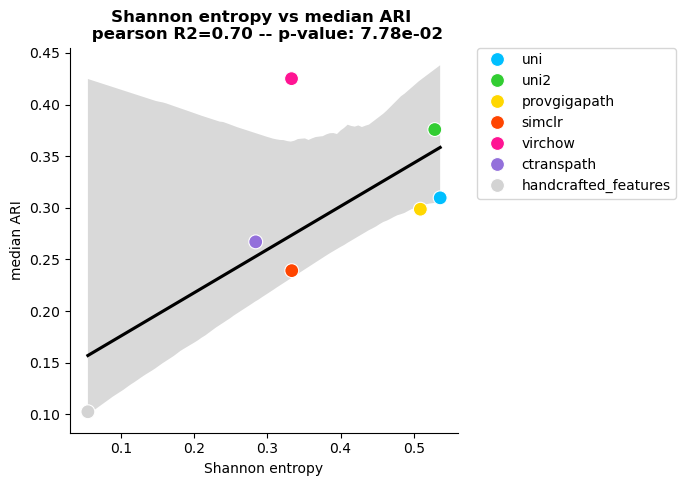

In [61]:
# df_model_summary = df_model_summary.drop(["uni_full_4096_prototypes"])
median_ari_per_model = df_comp[df_comp['clustering'] == 'umap'][['model', 'ari']].groupby('model').median()
median_ari_per_model.columns = ['median_ari']
df_model_summary = df_shannon.merge(median_ari_per_model, left_index=True, right_index=True)

s, p = pearsonr(df_model_summary['shannon_entropy'], df_model_summary['median_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary, x='shannon_entropy', y='median_ari', color='black')
sns.scatterplot(data=df_model_summary, x='shannon_entropy', y='median_ari', hue=df_model_summary.index,
                palette=base_model_palette, s=100, zorder=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('median ARI')
plt.title(f'Shannon entropy vs median ARI \n pearson R2={s:.2f} -- p-value: {p:.2e}', weight='bold')
sns.despine()
plt.savefig(os.path.join(config['figures_folder'], "Figure2/shannon_entropy_vs_median_ari.pdf"), bbox_inches='tight')

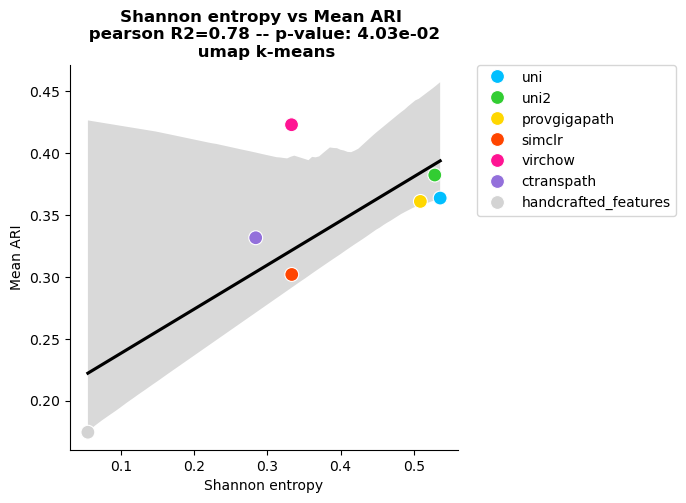

In [62]:
# df_model_summary = df_model_summary.drop(["uni_full_4096_prototypes"])
mean_ari_per_model = df_comp[df_comp['clustering'] == 'umap'][['model', 'ari']].groupby('model').mean()
mean_ari_per_model.columns = ['mean_ari']
df_model_summary = df_shannon.merge(mean_ari_per_model, left_index=True, right_index=True)

s, p = pearsonr(df_model_summary['shannon_entropy'], df_model_summary['mean_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary, x='shannon_entropy', y='mean_ari', color='black')
sns.scatterplot(data=df_model_summary, x='shannon_entropy', y='mean_ari', hue=df_model_summary.index,
                palette=base_model_palette, s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('Mean ARI')
plt.title(f'Shannon entropy vs Mean ARI \n pearson R2={s:.2f} -- p-value: {p:.2e} \n umap k-means', weight='bold')
sns.despine()
plt.savefig(os.path.join(config['figures_folder'], "Figure2/shannon_entropy_vs_mean_ari_umapkmeans.pdf"), bbox_inches='tight')

In [63]:
# try:
#     with open(os.path.join(config['base_benchmark_folder'], 'unsupervised_clustering_ARI', 'kmeans', f"best_umap_ari_overall_annotated_only.json")) as f:
#         overall_umap = json.load(f)
# except:
overall_umap = benchmark_clustering.get_best_UMAP_ari_overall(annotated_only=True)
    
overall_umap_aris = {}
for model in overall_umap.keys():
    overall_umap_aris[model] = overall_umap[model]['ari']

overall_umap_aris["handcrafted_features"] = json.load(open(os.path.join(benchmark_clustering.saving_folder, f'best_umap_ari_model_handcrafted_features_all_annotated_only.json')))['ari']

df_model_summary['overall_ari'] = pd.Series(overall_umap_aris)

Computing best UMAP parameters for model uni...
Loading best UMAP parameters for model uni...
Computing best UMAP parameters for model uni2...
Loading best UMAP parameters for model uni2...
Computing best UMAP parameters for model virchow...
Loading best UMAP parameters for model virchow...
Computing best UMAP parameters for model provgigapath...
Loading best UMAP parameters for model provgigapath...
Computing best UMAP parameters for model ctranspath...
Loading best UMAP parameters for model ctranspath...
Computing best UMAP parameters for model simclr...
Loading best UMAP parameters for model simclr...


In [64]:
df_model_summary

,shannon_entropy,mean_ari,overall_ari
uni,0.535894,0.363723,0.305062
uni2,0.528527,0.382347,0.341491
provgigapath,0.508850,0.360998,0.333983
simclr,0.333180,0.301931,0.264925
virchow,0.332856,0.423028,0.329406
ctranspath,0.283942,0.331628,0.266727
handcrafted_features,0.054714,0.174355,0.074728


(0.05, 0.4)

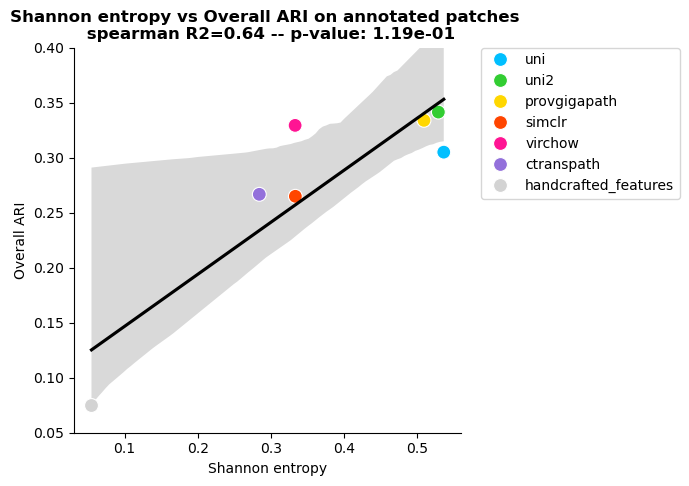

In [65]:
s, p = spearmanr(df_model_summary['shannon_entropy'], df_model_summary['overall_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary, x='shannon_entropy', y='overall_ari', color='black')
sns.scatterplot(data=df_model_summary, x='shannon_entropy', y='overall_ari', hue=df_model_summary.index,
                palette=base_model_palette, s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('Overall ARI')
plt.title(f'Shannon entropy vs Overall ARI on annotated patches \n spearman R2={s:.2f} -- p-value: {p:.2e}', weight='bold')
sns.despine()
plt.savefig(os.path.join(config['figures_folder'], "Figure2/shannon_entropy_vs_overall_ari_annotated_only.pdf"), bbox_inches='tight')
plt.ylim(0.05, 0.4)
#plt.xlim(0.05, 0.55)

In [66]:
json.load(open(os.path.join(benchmark_clustering.saving_folder, f'best_umap_ari_model_handcrafted_features_all.json')))

{'ari': 1.0,
 'params': {'n_neighbors': 10, 'min_dist': 0.001, 'n_components': 2}}

In [67]:
benchmark_clustering.saving_folder

'../../results/TNBC/benchmark/base_models/unsupervised_clustering_ARI/kmeans'

Computing best UMAP parameters for model uni...
Loading best UMAP parameters for model uni...
Computing best UMAP parameters for model uni2...
Loading best UMAP parameters for model uni2...
Computing best UMAP parameters for model virchow...
Loading best UMAP parameters for model virchow...
Computing best UMAP parameters for model provgigapath...
Loading best UMAP parameters for model provgigapath...
Computing best UMAP parameters for model ctranspath...
Loading best UMAP parameters for model ctranspath...
Computing best UMAP parameters for model simclr...
Loading best UMAP parameters for model simclr...


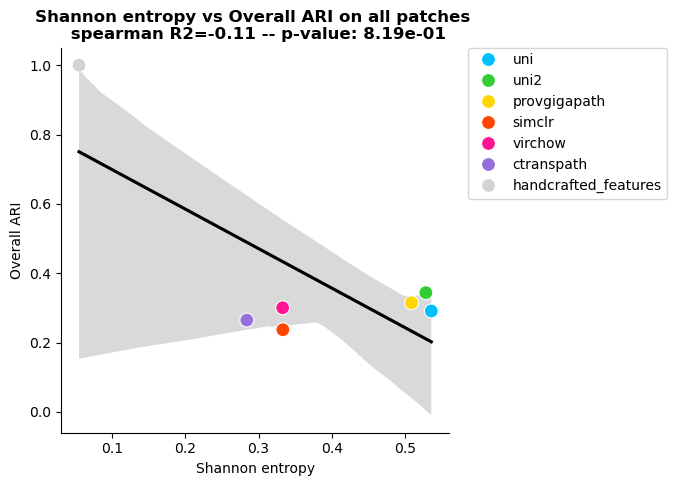

In [68]:
# try:
#     with open(os.path.join(config['base_benchmark_folder'], 'unsupervised_clustering_ARI', 'kmeans', f'best_umap_ari_overall.json')) as f:
#         overall_umap = json.load(f)
# except:
overall_umap = benchmark_clustering.get_best_UMAP_ari_overall()
    
overall_umap_aris = {}
for model in overall_umap.keys():
    overall_umap_aris[model] = overall_umap[model]['ari']
overall_umap_aris["handcrafted_features"] = json.load(open(os.path.join(benchmark_clustering.saving_folder, f'best_umap_ari_model_handcrafted_features_all.json')))['ari']

df_model_summary['overall_ari'] = pd.Series(overall_umap_aris)

s, p = spearmanr(df_model_summary['shannon_entropy'], df_model_summary['overall_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary, x='shannon_entropy', y='overall_ari', color='black')
sns.scatterplot(data=df_model_summary, x='shannon_entropy', y='overall_ari', hue=df_model_summary.index,
                palette=base_model_palette, s=100, zorder=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('Overall ARI')
plt.title(f'Shannon entropy vs Overall ARI on all patches \n spearman R2={s:.2f} -- p-value: {p:.2e}', weight='bold')
sns.despine()
plt.savefig(os.path.join(config['figures_folder'], "Figure2/shannon_entropy_vs_overall_ari.pdf"), bbox_inches='tight')

In [69]:
df_model_summary

,shannon_entropy,mean_ari,overall_ari
uni,0.535894,0.363723,0.291109
uni2,0.528527,0.382347,0.343936
provgigapath,0.508850,0.360998,0.314869
simclr,0.333180,0.301931,0.237102
virchow,0.332856,0.423028,0.300510
ctranspath,0.283942,0.331628,0.264986
handcrafted_features,0.054714,0.174355,1.000000


In [70]:
df_model_summary2 = df_comp.merge(df_shannon, left_on='model', right_index=True, how='left')
df_model_summary2

,model,ari,patient,clustering,shannon_entropy
0,uni,0.401375,TNBC1_CN1_C1,raw,0.535894
1,uni,0.514197,TNBC2_CN1_E1,raw,0.535894
2,uni,0.168349,TNBC3_CN2_C1,raw,0.535894
3,uni,0.824906,TNBC4_CN2_D2,raw,0.535894
4,uni,0.328768,TNBC5_CN3_D1,raw,0.535894
...,...,...,...,...,...
653,simclr,0.094657,TNBC53_CN27_C1,umap,0.333180
654,simclr,0.161530,TNBC80_CN40_E2,umap,0.333180
655,simclr,0.340460,TNBC40_CN20_E1,umap,0.333180
656,simclr,0.591846,TNBC22_CN11_E2,umap,0.333180


In [108]:
with open(os.path.join(config['base_benchmark_folder'], "shannon_entropy", "shannon_entropy_per_tumor_all_comps_raw.json")) as f:
    shannon_per_patient = json.load(f)
df_shannon_per_patient = pd.DataFrame.from_dict(shannon_per_patient, orient='index')

df_model_summary2 = df_comp[df_comp["clustering"] == 'umap'].merge(df_shannon_per_patient, left_on='patient', right_index=True, how='left')
df_shannon_per_patient_melted = pd.melt(df_shannon_per_patient, var_name='patient', value_name='shannon_entropy_per_patient')
df_shannon_per_patient_melted['model'] = list(df_shannon_per_patient.index) * len(df_shannon_per_patient.columns)

if config['dataset'] == 'HER2':
    df_comp['patient'] = df_comp['patient'].apply(lambda x: x[0])
else:
    df_comp['patient'] = df_comp['patient'].apply(lambda x: x.split('_')[0])
    
df_shannon_per_patient_melted["model"] = df_shannon_per_patient_melted["model"].apply(lambda x: x.replace("handcrafted", "handcrafted_features"))

df_model_summary2 = df_comp[df_comp["clustering"] == 'umap'].merge(df_shannon_per_patient_melted, on=['patient', 'model'])

/tmp/ipykernel_2349933/3584402485.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_vs_mean = df_model_summary2.groupby('model').mean()


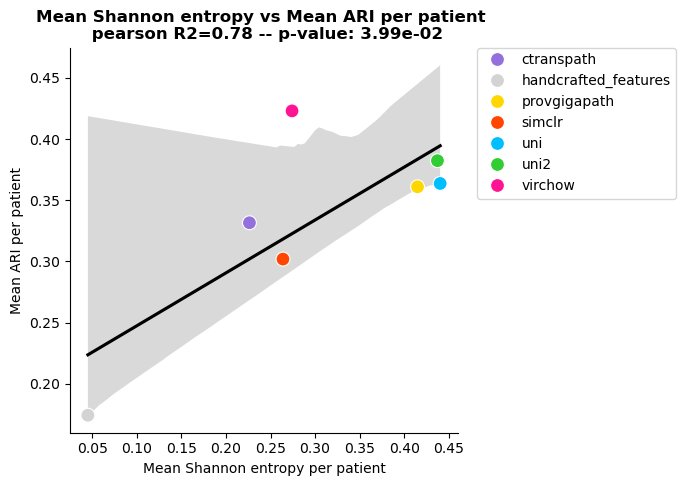

In [112]:
mean_vs_mean = df_model_summary2.groupby('model').mean()

s, p = pearsonr(mean_vs_mean['shannon_entropy_per_patient'], mean_vs_mean['ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=mean_vs_mean, x='shannon_entropy_per_patient', y='ari', color='black')
sns.scatterplot(data=mean_vs_mean, x='shannon_entropy_per_patient', y='ari', hue=mean_vs_mean.index,
                palette=base_model_palette, s=100, zorder=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Mean Shannon entropy per patient')
plt.ylabel('Mean ARI per patient')
plt.title(f'Mean Shannon entropy vs Mean ARI per patient \n pearson R2={s:.2f} -- p-value: {p:.2e}', weight='bold')
sns.despine()
plt.savefig(os.path.join(config['figures_folder'], "Figure2/mean_shannon_entropy_vs_mean_ari.pdf"), bbox_inches='tight')

## Correlation with the number of parameters

In [73]:

parameters = {'provgigapath': 1135, 'uni2': 681, 'virchow': 632, 'uni': 303, 'ctranspath': 28, 'simclr': 24}

embedding_size = {'provgigapath': 1536, 'uni2': 1536, 'virchow': 1280, 'uni': 1024, 'ctranspath': 768, 'simclr': 512}


In [74]:
df_shannon

df_parameters = pd.DataFrame.from_dict(parameters, orient='index', columns=['n_parameters'])
df_parameters = df_parameters.merge(df_shannon, left_index=True, right_index=True)

df_embedding_size = pd.DataFrame.from_dict(embedding_size, orient='index', columns=['embedding_size'])
df_embedding_size = df_embedding_size.merge(df_shannon, left_index=True, right_index=True)

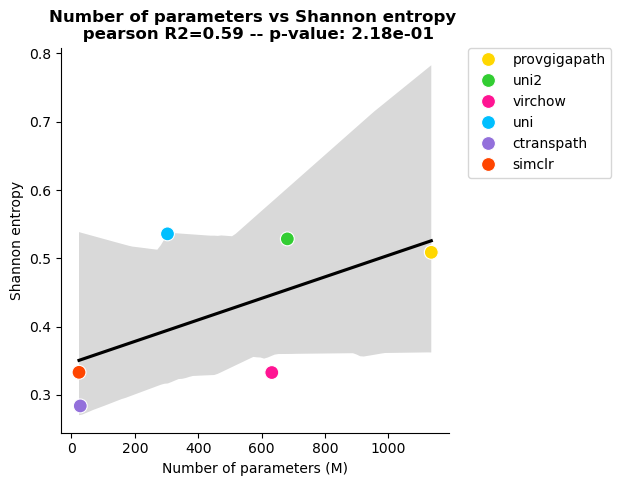

In [75]:
# compute pearson correlation

s, p = pearsonr(df_parameters['n_parameters'], df_parameters['shannon_entropy'])
plt.figure(figsize=(5, 5))
sns.regplot(df_parameters, x='n_parameters', y='shannon_entropy', color='black')
sns.scatterplot(df_parameters, x='n_parameters', y='shannon_entropy', hue=df_parameters.index, palette=base_model_palette, s=100, zorder=2)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Number of parameters (M)')
plt.ylabel('Shannon entropy')
plt.title(f"Number of parameters vs Shannon entropy \n pearson R2={s:.2f} -- p-value: {p:.2e}", weight='bold')
plt.savefig(os.path.join(config['figures_folder'], "Figure2/embedding_size_vs_shannon_entropy.pdf"), bbox_inches='tight')

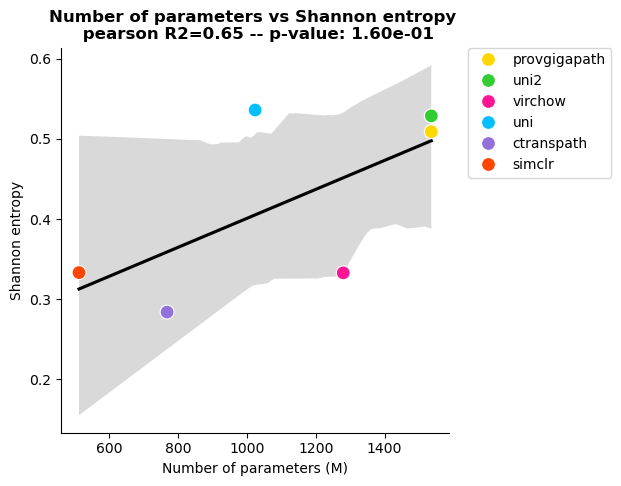

In [76]:
# compute pearson correlation

s, p = pearsonr(df_embedding_size['embedding_size'], df_embedding_size['shannon_entropy'])
plt.figure(figsize=(5, 5))
sns.regplot(df_embedding_size, x='embedding_size', y='shannon_entropy', color='black')
sns.scatterplot(df_embedding_size, x='embedding_size', y='shannon_entropy', hue=df_embedding_size.index, palette=base_model_palette, s=100, zorder=2)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Number of parameters (M)')
plt.ylabel('Shannon entropy')
plt.title(f"Number of parameters vs Shannon entropy \n pearson R2={s:.2f} -- p-value: {p:.2e}", weight='bold')
plt.savefig(os.path.join(config['figures_folder'], "Figure2/number_of_parameters_vs_shannon_entropy.pdf"), bbox_inches='tight')

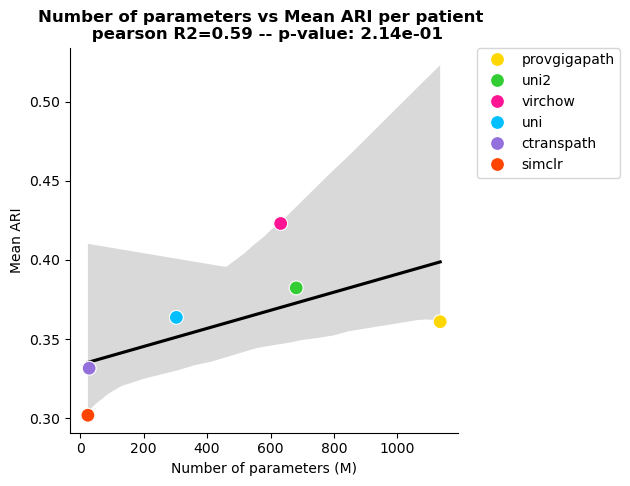

In [77]:
df_parameters = df_parameters.merge(df_model_summary[['mean_ari']], left_index=True, right_index=True)

s, p = pearsonr(df_parameters['n_parameters'], df_parameters['mean_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(df_parameters, x='n_parameters', y='mean_ari', color='black')
sns.scatterplot(df_parameters, x='n_parameters', y='mean_ari', hue=df_parameters.index, palette=base_model_palette, s=100, zorder=2)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Number of parameters (M)')
plt.ylabel('Mean ARI')
plt.title(f"Number of parameters vs Mean ARI per patient \n pearson R2={s:.2f} -- p-value: {p:.2e}", weight='bold')
plt.savefig(os.path.join(config['figures_folder'], "Figure2/number_of_parameters_vs_mean_ari.pdf"), bbox_inches='tight')

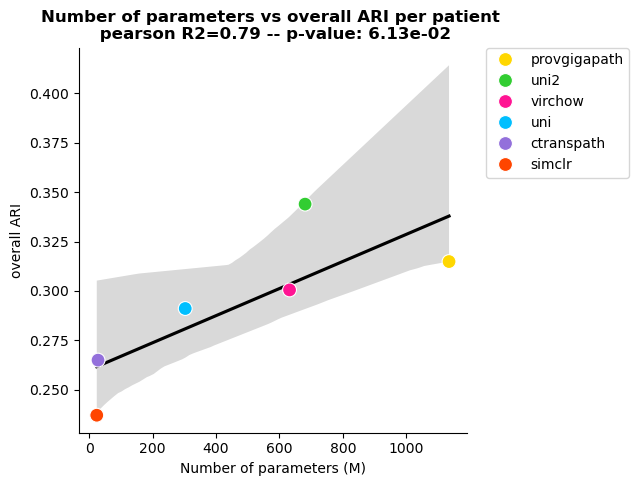

In [78]:
df_parameters = df_parameters.merge(df_model_summary[['overall_ari']], left_index=True, right_index=True)

s, p = pearsonr(df_parameters['n_parameters'], df_parameters['overall_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(df_parameters, x='n_parameters', y='overall_ari', color='black')
sns.scatterplot(df_parameters, x='n_parameters', y='overall_ari', hue=df_parameters.index, palette=base_model_palette, s=100, zorder=2)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Number of parameters (M)')
plt.ylabel('overall ARI')
plt.title(f"Number of parameters vs overall ARI per patient \n pearson R2={s:.2f} -- p-value: {p:.2e}", weight='bold')
plt.savefig(os.path.join(config['figures_folder'], "Figure2/number_of_parameters_vs_overall_ari.pdf"), bbox_inches='tight')

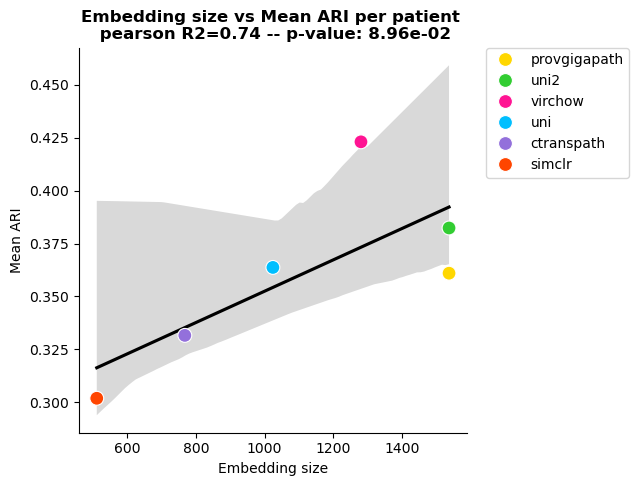

In [79]:
df_embedding_size = df_embedding_size.merge(df_model_summary[['mean_ari']], left_index=True, right_index=True)

s, p = pearsonr(df_embedding_size['embedding_size'], df_embedding_size['mean_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(df_embedding_size, x='embedding_size', y='mean_ari', color='black')
sns.scatterplot(df_embedding_size, x='embedding_size', y='mean_ari', hue=df_embedding_size.index, palette=base_model_palette, s=100, zorder=2)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Embedding size')
plt.ylabel('Mean ARI')
plt.title(f"Embedding size vs Mean ARI per patient \n pearson R2={s:.2f} -- p-value: {p:.2e}", weight='bold')
plt.savefig(os.path.join(config['figures_folder'], "Figure2/embedding_size_vs_mean_ari.pdf"), bbox_inches='tight')